# Create folder

In [12]:
cd home

/home


In [14]:
mkdir tanat

In [16]:
cd tanat

/home/tanat


# Loading the dataset

In [17]:
!wget  https://s3.amazonaws.com/imcbucket/data/flights/2008.csv

--2023-08-21 05:31:45--  https://s3.amazonaws.com/imcbucket/data/flights/2008.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.123.216, 52.216.212.0, 52.217.165.24, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.123.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [binary/octet-stream]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  75.6MB/s    in 9.2s    

2023-08-21 05:31:55 (71.2 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [19]:
ls

2008.csv


In [21]:
! wc -l ./2008.csv

7009729 ./2008.csv


In [22]:
! head -3 2008.csv

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,,0,NA,NA,NA,NA,NA
2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,,0,NA,NA,NA,NA,NA


In [23]:
!hdfs dfs -mkdir -p /user/root/input

In [24]:
!hadoop fs -put 2008.csv /user/root/input

In [25]:
!hdfs dfs -ls /user/root/input

Found 1 items
-rw-r--r--   2 root hadoop  689413344 2023-08-21 05:32 /user/root/input/2008.csv


In [26]:
airline_df = spark.read.format('csv').\
option('header','true').option('mode','DROPMALFORMED')\
.load('/user/root/input/2008.csv')

In [27]:
airline_df.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- CarrierDelay:

# Convert Data Type

In [28]:
from pyspark.sql.types import *
from pyspark.sql.functions import col, udf

In [29]:
airline_df = airline_df.\
withColumn('DepTime',airline_df['DepTime'].\
           cast(DoubleType())).\
withColumn('TaxiOut',airline_df['TaxiOut'].\
           cast(DoubleType())).\
withColumn('TaxiIn',airline_df['TaxiIn'].\
           cast(DoubleType())).\
withColumn('DepDelay',airline_df['DepDelay'].\
           cast(DoubleType())).\
withColumn('DayOfWeek',airline_df['DayOfWeek'].\
           cast(DoubleType())).\
withColumn('Distance',airline_df['Distance'].\
           cast(DoubleType())).\
withColumn('ArrDelay',airline_df['ArrDelay'].\
           cast(DoubleType()))

In [30]:
airline_df.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DayOfWeek: double (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- TaxiOut: double (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- CarrierDelay:

In [31]:
airline_df.take(5)

23/08/21 05:36:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime=2003.0, CRSDepTime='1955', ArrTime='2211', CRSArrTime='2225', UniqueCarrier='WN', FlightNum='335', TailNum='N712SW', ActualElapsedTime='128', CRSElapsedTime='150', AirTime='116', ArrDelay=-14.0, DepDelay=8.0, Origin='IAD', Dest='TPA', Distance=810.0, TaxiIn=4.0, TaxiOut=8.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime=754.0, CRSDepTime='735', ArrTime='1002', CRSArrTime='1000', UniqueCarrier='WN', FlightNum='3231', TailNum='N772SW', ActualElapsedTime='128', CRSElapsedTime='145', AirTime='113', ArrDelay=2.0, DepDelay=19.0, Origin='IAD', Dest='TPA', Distance=810.0, TaxiIn=5.0, TaxiOut=10.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='20

In [32]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

timeperiod = udf(lambda x: t_timeperiod(x),StringType())
airline_df2 = airline_df.withColumn('DepTime',timeperiod(airline_df['DepTime']))
airline_df2.take(5)

[Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='18.00-24.00', CRSDepTime='1955', ArrTime='2211', CRSArrTime='2225', UniqueCarrier='WN', FlightNum='335', TailNum='N712SW', ActualElapsedTime='128', CRSElapsedTime='150', AirTime='116', ArrDelay=-14.0, DepDelay=8.0, Origin='IAD', Dest='TPA', Distance=810.0, TaxiIn=4.0, TaxiOut=8.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='06.00-11.59', CRSDepTime='735', ArrTime='1002', CRSArrTime='1000', UniqueCarrier='WN', FlightNum='3231', TailNum='N772SW', ActualElapsedTime='128', CRSElapsedTime='145', AirTime='113', ArrDelay=2.0, DepDelay=19.0, Origin='IAD', Dest='TPA', Distance=810.0, TaxiIn=5.0, TaxiOut=10.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA')

# Normalization

In [33]:
from pyspark.sql.functions import *
max_distance = airline_df2.select(max('Distance')).collect()[0][0]
min_distance = airline_df2.select(min('Distance')).collect()[0][0]

max_distance,min_distance

(4962.0, 11.0)

In [34]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

normalized_distance = udf(lambda x: t_normalized_distance(x),DoubleType())
normalized_df = airline_df2.withColumn('Distance', normalized_distance(airline_df2['Distance']))
normalized_df.take(5)

[Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='18.00-24.00', CRSDepTime='1955', ArrTime='2211', CRSArrTime='2225', UniqueCarrier='WN', FlightNum='335', TailNum='N712SW', ActualElapsedTime='128', CRSElapsedTime='150', AirTime='116', ArrDelay=-14.0, DepDelay=8.0, Origin='IAD', Dest='TPA', Distance=0.16138153908301353, TaxiIn=4.0, TaxiOut=8.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='06.00-11.59', CRSDepTime='735', ArrTime='1002', CRSArrTime='1000', UniqueCarrier='WN', FlightNum='3231', TailNum='N772SW', ActualElapsedTime='128', CRSElapsedTime='145', AirTime='113', ArrDelay=2.0, DepDelay=19.0, Origin='IAD', Dest='TPA', Distance=0.16138153908301353, TaxiIn=5.0, TaxiOut=10.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='

In [35]:
max_ArrDelay = airline_df2.select(max('ArrDelay')).collect()[0][0]
min_ArrDelay = airline_df2.select(min('ArrDelay')).collect()[0][0]

max_ArrDelay,min_ArrDelay

(2461.0, -519.0)

In [36]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))


normalized_ArrDelay = udf(lambda x: t_normalized_ArrDelay(x),DoubleType())
normalized_df = normalized_df.withColumn('ArrDelay', normalized_ArrDelay(normalized_df['ArrDelay']))
normalized_df.take(5)

[Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='18.00-24.00', CRSDepTime='1955', ArrTime='2211', CRSArrTime='2225', UniqueCarrier='WN', FlightNum='335', TailNum='N712SW', ActualElapsedTime='128', CRSElapsedTime='150', AirTime='116', ArrDelay=0.16946308724832215, DepDelay=8.0, Origin='IAD', Dest='TPA', Distance=0.16138153908301353, TaxiIn=4.0, TaxiOut=8.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year='2008', Month='1', DayofMonth='3', DayOfWeek=4.0, DepTime='06.00-11.59', CRSDepTime='735', ArrTime='1002', CRSArrTime='1000', UniqueCarrier='WN', FlightNum='3231', TailNum='N772SW', ActualElapsedTime='128', CRSElapsedTime='145', AirTime='113', ArrDelay=0.17483221476510066, DepDelay=19.0, Origin='IAD', Dest='TPA', Distance=0.16138153908301353, TaxiIn=5.0, TaxiOut=10.0, Cancelled='0', CancellationCode=None, Diverted='0', CarrierDelay='NA', WeatherDelay='NA', 

# Choose Interesting Fields

In [37]:
features_df = normalized_df.select(['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay'])

final_df = features_df.dropna()
final_df.count()
final_df.show()

+-------------+------+----+-----------+-------+------+--------+---------+--------------------+-------------------+
|UniqueCarrier|Origin|Dest|    DepTime|TaxiOut|TaxiIn|DepDelay|DayOfWeek|            Distance|           ArrDelay|
+-------------+------+----+-----------+-------+------+--------+---------+--------------------+-------------------+
|           WN|   IAD| TPA|18.00-24.00|    8.0|   4.0|     8.0|      4.0| 0.16138153908301353|0.16946308724832215|
|           WN|   IAD| TPA|06.00-11.59|   10.0|   5.0|    19.0|      4.0| 0.16138153908301353|0.17483221476510066|
|           WN|   IND| BWI|06.00-11.59|   17.0|   3.0|     8.0|      4.0|  0.1017976166431024|0.17885906040268457|
|           WN|   IND| BWI|06.00-11.59|    7.0|   3.0|    -4.0|      4.0|  0.1017976166431024|0.17214765100671142|
|           WN|   IND| BWI|18.00-24.00|   10.0|   3.0|    34.0|      4.0|  0.1017976166431024| 0.1855704697986577|
|           WN|   IND| JAX|18.00-24.00|   10.0|   4.0|    25.0|      4.0|  0.136

# Divide datasets into training and test sets

In [38]:
training_df,test_df = final_df.randomSplit([0.8,0.2],seed=12)
training_df.count()
type(training_df)
training_df.printSchema()

root
 |-- UniqueCarrier: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- TaxiOut: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- DayOfWeek: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- ArrDelay: double (nullable = true)



In [ ]:
# Transformation categorical variable to numerical

In [39]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder

DepTimeIndexer = StringIndexer(inputCol='DepTime',outputCol='DepTimeIndexed')
DepTimeOneHotEncoder = OneHotEncoder(dropLast=False,inputCol='DepTimeIndexed',  outputCol='DepTimeVec')
UniqueCarrierIndexer = StringIndexer(inputCol='UniqueCarrier', outputCol='UniqueCarrierIndexed')
UniqueCarrierOneHotEncoder = OneHotEncoder(dropLast=False,inputCol='UniqueCarrierIndexed', outputCol='UniquecarrierVec')
OriginIndexer = StringIndexer(inputCol='Origin',outputCol='OriginIndexed')
OriginOneHotEncoder = OneHotEncoder(dropLast=False,inputCol='OriginIndexed', outputCol='OriginVec')
DestIndexer = StringIndexer(inputCol='Dest',outputCol='DestIndexed')
DestOneHotEncoder = OneHotEncoder(dropLast=False,inputCol='DestIndexed', outputCol='DestVec')

# Combines a selected columns into a single vector column.

In [40]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

featureAssembler = VectorAssembler(inputCols=['UniqueCarrierIndexed',
            'OriginVec',
           'DestVec',
            'DepTimeVec',
            'TaxiOut','TaxiIn',
            'DepDelay',
            'DayOfWeek',
            'Distance'
           ], outputCol='***features')

# Define an algorithm.

In [41]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
dt = RandomForestRegressor\
(labelCol='ArrDelay',featuresCol='***features')

In [42]:
pipeline_dt = Pipeline().setStages([UniqueCarrierIndexer,
           UniqueCarrierOneHotEncoder,
           DepTimeIndexer,
           DepTimeOneHotEncoder,
           OriginIndexer ,
           OriginOneHotEncoder,
           DestIndexer,
           DestOneHotEncoder,
           featureAssembler,dt])

In [43]:
dtModel = pipeline_dt.fit(training_df)
tree = dtModel.stages[9]
print(tree.toDebugString)

RandomForestRegressionModel: uid=RandomForestRegressor_b6c107e3b7f1, numTrees=20, numFeatures=615
  Tree 0 (weight 1.0):
    If (feature 612 <= 56.5)
     If (feature 612 <= 13.5)
      If (feature 610 <= 32.5)
       If (feature 611 <= 14.5)
        If (feature 611 <= 7.5)
         Predict: 0.17204161210502017
        Else (feature 611 > 7.5)
         Predict: 0.17288929153140473
       Else (feature 611 > 14.5)
        If (feature 611 <= 31.5)
         Predict: 0.1749193315480896
        Else (feature 611 > 31.5)
         Predict: 0.18169139372809082
      Else (feature 610 > 32.5)
       If (feature 0 in {4.0,5.0,7.0,9.0,10.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0})
        If (feature 612 <= 1.5)
         Predict: 0.1790160684223445
        Else (feature 612 > 1.5)
         Predict: 0.18313503332361403
       Else (feature 0 not in {4.0,5.0,7.0,9.0,10.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0})
        If (feature 18 in {1.0})
         Predict: 0.17868799626310092
        Else (feature 18 n

# Evaluation

In [44]:
result_df = dtModel.transform(test_df.dropna())
result_df.select(['ArrDelay','Prediction']).show()

+-------------------+-------------------+
|           ArrDelay|         Prediction|
+-------------------+-------------------+
|0.17248322147651007|0.17299337545138158|
|0.17114093959731544|0.17217473444805667|
|0.17315436241610738|0.17335371716259612|
| 0.1761744966442953| 0.1731208823825085|
|0.18053691275167785|0.17480524408628156|
|0.17885906040268457| 0.1734903767515589|
|0.17852348993288591|0.17968049676220285|
|0.16610738255033558|0.17280352916247593|
|0.17315436241610738|0.17400453015879097|
|0.16375838926174496|0.17280407824301805|
|0.17718120805369128|0.17400453015879097|
|0.18691275167785235| 0.1805540244138549|
|0.17281879194630873| 0.1744451595776082|
| 0.1738255033557047|0.17862599215933667|
|  0.175503355704698|0.17347899340186182|
| 0.1761744966442953|0.17861122567890728|
|0.17651006711409395|0.17280352916247593|
|  0.174496644295302| 0.1743739113597393|
| 0.1976510067114094|0.20127358691026753|
|0.17516778523489934|0.17288704255970772|
+-------------------+-------------

In [45]:
training_df.count()

5482072

# Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prediction  3500 non-null   float64
 1   ArrDelay    3500 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB
None


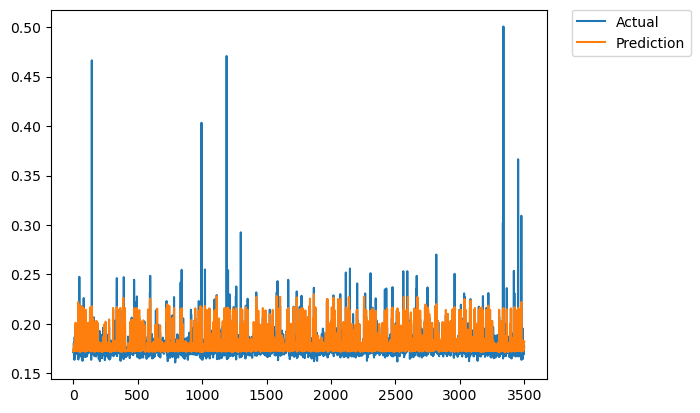

In [49]:
! pip install pandas
#sample for 3500 row from 1361937 millions
lr_prediction_sample = result_df.select("prediction","ArrDelay")
lr_prediction_sample1 = lr_prediction_sample.limit(3500)
lr_prediction_sample2 = lr_prediction_sample1.sort("ArrDelay", ascending=True)
#convert to pandas
lr_prediction_sample_pd = lr_prediction_sample1.toPandas()

print(lr_prediction_sample_pd.info())
lr_prediction_sample_pd.head(5)

lr_prediction_sample_pd['id'] = lr_prediction_sample_pd.index

! pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.plot(lr_prediction_sample_pd['id'] , lr_prediction_sample_pd['ArrDelay'],label='Actual')
#plt.plot(cv_prediction_sample_pd['id'] , cv_prediction_sample_pd['prediction'],label='CV_Prediction')
plt.plot(lr_prediction_sample_pd['id'] , lr_prediction_sample_pd['prediction'],label='Prediction')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Model tuning

In [48]:
from pyspark.ml.evaluation import RegressionEvaluator
new_test_df1 = test_df.filter(test_df.Origin != 'TUP')\
.filter(test_df.Origin != 'PIR')\
.filter(test_df.Dest != 'TUP')\
.filter(test_df.Dest != 'PIR')\
.filter(test_df.Origin != 'PUB')\
.filter(test_df.DepTime != '425')\
.filter(test_df.DepTime != '328')\
.filter(test_df.DepTime != '437')\
.filter(test_df.DepTime != '400')\
.filter(test_df.DepTime != '414')\
.filter(test_df.DepTime != '424')\
.filter(test_df.DepTime != '439')\
.filter(test_df.DepTime != '338')\
.filter(test_df.DepTime != '359')\
.filter(test_df.DepTime != '412')\
.filter(test_df.DepTime != '430')\

everesult_df = dtModel.transform(new_test_df1.dropna())
lr_evaluator_r2 = RegressionEvaluator\
(predictionCol="prediction",labelCol="ArrDelay",metricName="r2")
print("R Squared (R2) on test data = %g" \
      % lr_evaluator_r2.evaluate(everesult_df))

lr_evaluator_rmse = RegressionEvaluator\
(predictionCol="prediction",labelCol="ArrDelay",metricName="rmse")
print("Root Mean Squared Error (RMSE) on test data = %g" \
      % lr_evaluator_rmse.evaluate(everesult_df))

R Squared (R2) on test data = 0.718209


Root Mean Squared Error (RMSE) on test data = 0.00686767
